Lambda School Data Science

*Unit 4, Sprint 3, Module 1*

---


# Recurrent Neural Networks (RNNs) and Long Short Term Memory (LSTM) (Prep)

<img src="https://media.giphy.com/media/l2JJu8U8SoHhQEnoQ/giphy.gif" width=400 height=300>
<br></br>
<br></br>

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe Neural Networks used for modeling sequences
- <a href="#p2">Part 2: </a>Apply a LSTM to a text generation problem using Keras

## Overview

> "Yesterday's just a memory - tomorrow is never what it's supposed to be." -- Bob Dylan

Wish you could save [Time In A Bottle](https://www.youtube.com/watch?v=AnWWj6xOleY)? With statistics you can do the next best thing - understand how data varies over time (or any sequential order), and use the order/time dimension predictively.

A sequence is just any enumerated collection - order counts, and repetition is allowed. Python lists are a good elemental example - `[1, 2, 2, -1]` is a valid list, and is different from `[1, 2, -1, 2]`. The data structures we tend to use (e.g. NumPy arrays) are often built on this fundamental structure.

A time series is data where you have not just the order but some actual continuous marker for where they lie "in time" - this could be a date, a timestamp, [Unix time](https://en.wikipedia.org/wiki/Unix_time), or something else. All time series are also sequences, and for some techniques you may just consider their order and not "how far apart" the entries are (if you have particularly consistent data collected at regular intervals it may not matter).


## Introduction to Sequencial Data

Before we dive into the inner workings of an LSTM model, let's try to understand and appreciate the recusive relationships of numbers in both pure mathematics and in the physical reality in which we find ourselves embedded. 


As usually we take attempt to understand a concept from at least 3 different perspectives:
- Algebraic
- Geometric
- Coding an example


A [**recurrence relation**](https://en.wikipedia.org/wiki/Recurrence_relation) in math is an equation that uses recursion to define a sequence of numbers - a famous example is the Fibonacci numbers.

Here is the algorithm for generating the numbers in the Fibonacci sequence: 

$$F_n = F_{n-1} + F_{n-2}$$

You need a base case $F_0=1, F_1=1$ (i.e. a starting point) to get the sequence started and then from then on our the sequence is self-generating. 

So this means that we can start generating our sequence: 

$$F_0=1,~~  F_1=1 $$

$$F_2 = F_{1} + F_{0} ~=~ 1 + 1 ~=~ 2$$

Then

$$F_3 = F_{2} + F_{1} ~=~ 2 + 1 ~=~ 3$$

Then 

$$F_4 = F_{3} + F_{2} ~=~ 3 + 2 ~=~ 5$$

Then 

$$F_5 = F_{4} + F_{3} ~=~ 5 + 3 ~=~ 8$$

I hope you get the idea. 

Before we we code up this sequence, let's appreciate how important and ubiquitous it is in nature. 


<img src="http://www.davidbeahm.com/wp-content/uploads/2011/11/fibonacci-1024x637.jpg" width=480 height=356>

<img src="https://i.pinimg.com/originals/f2/cb/34/f2cb3452dd774bab87bbee2b8a77d4bb.png" width=480 height=356>

<img src="https://i.pinimg.com/originals/32/d7/47/32d747bea24f4756dc4c5ffe61b36efd.jpg" width=240 height=300>

<img src="https://f4.bcbits.com/img/a3628582449_10.jpg" width=300 height=360>

[Golden Ratio and Fibonacci Sequence](https://math.libretexts.org/Courses/College_of_the_Canyons/Math_100%3A_Liberal_Arts_Mathematics_(Gavilan_and_Radtke)/07%3A_Mathematics_and_the_Arts/7.02%3A_The_Golden_Ratio_and_Fibonacci_Sequence)

**Take Away:** 
- Recursive sequences are located everywhere in life - but we need to know what we're looking for and where to look for it. 
- Simply try to develop an appreciation for the connection between mathematics and all of physical reality. 


## Code up the Fibonacci Sequence (Self Learning)
Again, here is the algorithm for the Fibonacci numbers.  


$$F_n = F_{n-1} + F_{n-2}$$


You need a base case to get your sequence started. This time let  $F_0=0 ~\text{and}~ F_1=1$. 

In [ ]:
def fibo(n):
    """
    Calculate and return the next number in the Fibonacci sequence
    
    Input
    -----
    n: int or float
        The nth number in the sequence (think of it as an index for a list)
        
    Return
    ------
    F_n: the next number in the sequence generated from the previous two numbers in the sequence 
    """
    
    if n <= 1:
        # if n = 0, then return 0 
        return n
    else:
        # this is the recursive part 
        # notice how the function is a function of itself!
        #  F_n =       F_n-1 + F_n-2
        return(fibo(n-1) + fibo(n-2))

# generate a Fibonacci Sequence
fibo(8)

21

**Take Away:** 

Recursive algorithms have as input their previous output. In order words, the output at time step `t - 1`, becomes in the input in the following time step `t`. This is the key idea of that you should observe. Because it is this recursive behavior that is new to how we will think about neural networks, specifically the LSTM model. 

# Neural Networks for Sequences (Learn)

-----

## Introduction to Recursive Neural Networks (RNNs) 


The nice thing about spending time to understand the Fibonacci Sequence is that we can then `borrow the intuition` that we picked up to help us understand how the LSTM works. 

Different Recursive Neural Networks (RNNs) have this recursive loop in their architecture. The ML research community first created the following RNN model using the standard Fully-Connected Forward Feeding (FCFF) model: 

![Recurrent neural network](https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg)

`This type of RNN had severe limitations!` 

- It didn't have long-term memory capacity to learn long input sequences 
- It suffered from the [Vanishing Gradient Problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

Example:  
**He** doesn't have very much confidence in **himself**  
**She** doesn't have very much confidence in **herself**  

 
   
In response to these limitations, the ML research community created the LSTM model, using the following architecture:

![Long short-term memory unit](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Long_Short-Term_Memory.svg/1024px-Long_Short-Term_Memory.svg.png)

Wow! Ok! There's a lot going on here, isn't there? Well, don't worry, we are going to break this model down bit-by-bit so we can understand what is happening. 


_____


## Theory of LSTM (Good to know)

One of the simplist and clearest explanations of the LSTM model can be found [**here!**](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) - a beautifully clear and concise explaination the model's archtecture and the mathematics. This link will serve as our main resouce for understanding how LSTMs work. 

Below are the equations for each of the gates that are explained in the article. 

Although, you will not be held responsible for the equations in any quiz, module assignment, or Sprint Challenge - it is still instructive to be exposed to them at least once.

First thing to notice is that each gate equation (not the cell states) has the form of a perceptron. 

`Remember the perceptron?` It's the fundamental building block of neural networks - it's not going away! 

Once you understand that, it will hopefully become gradually clear that each gate is a perceptron with a different job to do. 

That's it. 

It's just 4 perceptrons, each with a different job to do. 

Fortunately, you already know about perceptrons (you built one from scratch in `Sprint 2 Module 1`). 

____

### Gates in More Detail

#### Forget Gate
This neuron's job is to use the current input to learn what information the cell state should forget regarding long-term dependencies. 


$$f_t = \sigma(W_f \cdot [h_{t-1},x_t]~+~b_f)$$

#### Input Gate
This neuron's job is to use the current input to learn what new information to include in the cell state. 


$$i_t = \sigma(W_i \cdot [h_{t-1},x_t]~+~b_i)$$

#### Candidate Cell State 
This neuron's job is to use the current input to create a candidate cell state.

This new candidate cell state will be used to update the model's final cell state.

$$\tilde{C}_t = \text{tanh}(W_C \cdot [h_{t-1},x_t]~+~b_C)$$

#### New Cell State
This is where the candidate and old cell state are combined to create a new cell state.

This is where output from the forget gate $f_t$ is used to scaled the old cell state

- If $f_t$'s value is closer to 0.0, then less information from the previous cell state is retained.
- If $f_t$'s value is closer to 1.0, then more information from the previous cell state is retained. 


This is also where the output of the input gate $i_t$ is used to scaled the candidate cell state. 
- If $i_t$'s value is closer to 0.0, then less information from the candidate cell state is retained
- If $i_t$'s value is closer to 1.0, then more information from the candidate cell state is retained. 

Finally, you combine the two scaled cell states to form the new cell state of the model. 

It is $C_t$ that will be passed into the next training step and used by the output to make a final prediction. 

$$C_t = f_t*C_{t-1} + i_t*\tilde{C}_t$$

#### Output Gate
This is where the actual output of the model is calcuated. 

The article denotes the model's pre-scaled output as $o_t$ and the scaled output as $h_t$. To be clear, it is $h_t$ that ultimately gets outputed as the model's final prediction. 

We are familiar with the notation $y$ to denote a model's prediction instead of using $h$. But they both mean the same thing - the model's final prediction. 

This neuron's job is to take the current input and make a prediction. 

$$o_t = \sigma(W_o \cdot [h_{t-1},x_t]~+~b_o)$$

Next, the cell state is used to inform the final prediction. 

Recall that $o_t$ is output from a sigmoid activation function, so it's value is somewhere between 0 and 1. 

Which means that it is being used to scale $\text{tanh}(C_t)$ which contains the current cell state. 

Recall the tanh curve and you'll see that tanh is scaling $C_t$ so that it's value lies between -1 and 1; this makes it possible to have positive and negative values for the model's output. Sigmoids don't allow for the posibility of negative values, but tanh does. 

$$h_t = o_t*\text{tanh}(C_t)$$



_________

### Today's Application of LSTMs

So why are these cool? 

One particularly compelling application is actually not time series but language modeling - language is inherently ordered data (letters/words go one after another, and the order *matters*). [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) is a famous and worth reading blog post on this topic.

For our purposes, let's use TensorFlow and Keras to train RNNs with natural language. 

Resources:
- https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py
- https://keras.io/layers/recurrent/#lstm
- http://adventuresinmachinelearning.com/keras-lstm-tutorial/

Note that `tensorflow.contrib` [also has an implementation of RNN/LSTM](https://www.tensorflow.org/tutorials/text/text_generation).

## Follow Along

Sequences come in many shapes and forms from stock prices to text. We'll focus on text, because modeling text as a sequence is a strength of Neural Networks. Let's start with a simple classification task using a TensorFlow tutorial. 

### RNN/LSTM Sentiment Classification with Keras

In [ ]:
import numpy as np
import random
import sys
import os
import pandas as pd

In [ ]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
len(x_train[1])

189

In [ ]:
def print_text_from_seq(x):
    # print('=================================================')
    INDEX_FROM=3   # word index offset
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2
    word_to_id["<UNUSED>"] = 3

    id_to_word = {value:key for key,value in word_to_id.items()}
  
    print(f'Length = {len(x)}')
    print(' '.join(id_to_word[id] for id in x ))
    print('=================================================')

In [ ]:
for i in range(0, 6):
    print(x_train[i])
    print_text_from_seq(x_train[i])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Length = 218
<START> this film was just brillian

In [ ]:
print('Pad Sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad Sequences (samples x time)
x_train shape:  (25000, 80)
x_test shape:  (25000, 80)


In [ ]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

In [ ]:
print_text_from_seq(x_train[0])

Length = 80
that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all


In [ ]:
# the review labels are balanced: 50% are positive and 50% are negivate
y_train.sum()/len(y_train)

0.5

In [ ]:
from tensorflow.keras.layers import Dropout

model_fc = Sequential()
model_fc.add(Embedding(max_features, 128))  
model_fc.add(Dropout(0.1))
model_fc.add(Dense(50, activation='relu'))
model_fc.add(Dropout(0.1))
model_fc.add(Dense(50, activation='relu'))
model_fc.add(Dropout(0.1))
model_fc.add(Dense(1, activation='sigmoid'))
model_fc.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
model_fc.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
dense (Dense)                (None, None, 50)          6450      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 50)          2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           5

In [ ]:
output_fc = model_fc.fit(x_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=20, 
                         validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 23s 28ms/step - loss: 0.6852 - accuracy: 0.5408 - val_loss: 0.6792 - val_accuracy: 0.5548
Epoch 2/20
782/782 [==============================] - 22s 28ms/step - loss: 0.6735 - accuracy: 0.5659 - val_loss: 0.6830 - val_accuracy: 0.5464
Epoch 3/20
782/782 [==============================] - 22s 28ms/step - loss: 0.6721 - accuracy: 0.5647 - val_loss: 0.6808 - val_accuracy: 0.5553
Epoch 4/20
782/782 [==============================] - 21s 27ms/step - loss: 0.6706 - accuracy: 0.5686 - val_loss: 0.6816 - val_accuracy: 0.5555
Epoch 5/20
782/782 [==============================] - 22s 28ms/step - loss: 0.6704 - accuracy: 0.5673 - val_loss: 0.6815 - val_accuracy: 0.5552
Epoch 6/20
782/782 [==============================] - 21s 27ms/step - loss: 0.6696 - accuracy: 0.5684 - val_loss: 0.6826 - val_accuracy: 0.5556
Epoch 7/20
782/782 [==============================] - 21s 27ms/step - loss: 0.6694 - accuracy: 0.5675 - val_loss: 0.6827 - val_accuracy:

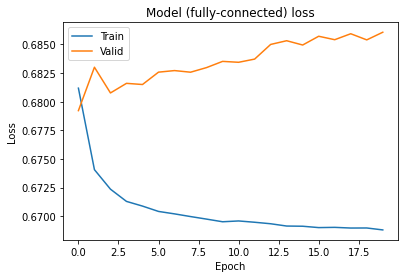

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(output_fc.history['loss'])
plt.plot(output_fc.history['val_loss'])
plt.title('Model (fully-connected) loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show();

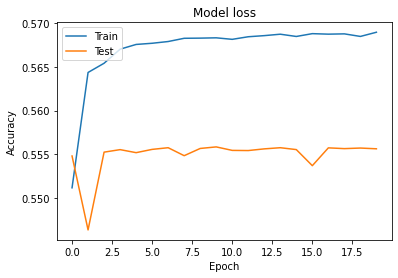

In [ ]:
# Plot training & validation accuracy values
plt.plot(output_fc.history['accuracy'])
plt.plot(output_fc.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

### Let's try improve the model

In [ ]:
from tensorflow.keras.layers import Bidirectional

# Define LSTM Architecture
lstm = Sequential()
lstm.add(Embedding(max_features, 64, input_length=maxlen))
lstm.add(LSTM(128, return_sequences=True))
lstm.add(Dropout(0.2))

# If you want to stack LSTM layers (need to return sequences i.e. hiddent state)
lstm.add(LSTM(128))
lstm.add(Dropout(0.2))

lstm.add(Dense(1, activation='sigmoid'))

lstm.compile(loss='binary_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 64)            1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 80, 128)           98816     
_________________________________________________________________
dropout_3 (Dropout)          (None, 80, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,510,529
Trainable params: 1,510,529
Non-trainable params: 0
____________________________________________

In [ ]:
# from tensorflow.keras.layers import Bidirectional

# # increase dropout up to 0.6 does not help, , activation='relu' not really useful
# # Define LSTM Architecture
# lstm = Sequential()
# lstm.add(Embedding(max_features, 128, input_length=maxlen))
# lstm.add(LSTM(128, return_sequences=True))
# lstm.add(Dropout(0.2))

# # If you want to stack LSTM layers (need to return sequences i.e. hiddent state)
# lstm.add(LSTM(128, return_sequences=True))
# lstm.add(Dropout(0.2))   

# # If you want to add Bidirectional LSTM
# lstm.add(Bidirectional(LSTM(128)))
# lstm.add(Dropout(0.2))

# lstm.add(Dense(1, activation='sigmoid'))

# lstm.compile(loss='binary_crossentropy',
#              optimizer='adam', 
#              metrics=['accuracy'])
# lstm.summary()

In [ ]:
x_train.shape

(25000, 80)

In [ ]:
lstm_history = lstm.fit(x_train, y_train,
                        batch_size=batch_size, 
                        epochs=15, 
                        validation_data=(x_test, y_test))

Epoch 1/15
782/782 [==============================] - 27s 30ms/step - loss: 0.5179 - accuracy: 0.7231 - val_loss: 0.3568 - val_accuracy: 0.8415
Epoch 2/15
782/782 [==============================] - 22s 29ms/step - loss: 0.2467 - accuracy: 0.9049 - val_loss: 0.3893 - val_accuracy: 0.8309
Epoch 3/15
782/782 [==============================] - 23s 29ms/step - loss: 0.1482 - accuracy: 0.9469 - val_loss: 0.5111 - val_accuracy: 0.8263
Epoch 4/15
782/782 [==============================] - 22s 29ms/step - loss: 0.0921 - accuracy: 0.9681 - val_loss: 0.6198 - val_accuracy: 0.8137
Epoch 5/15
782/782 [==============================] - 23s 29ms/step - loss: 0.0614 - accuracy: 0.9795 - val_loss: 0.6714 - val_accuracy: 0.8055
Epoch 6/15
782/782 [==============================] - 22s 28ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.7082 - val_accuracy: 0.8144
Epoch 7/15
782/782 [==============================] - 22s 29ms/step - loss: 0.0313 - accuracy: 0.9907 - val_loss: 0.7682 - val_accuracy:

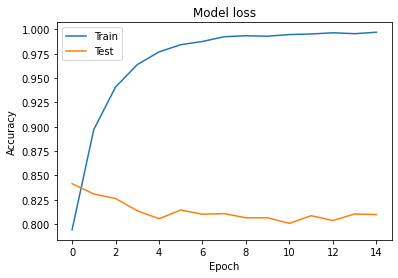

In [ ]:
# Plot training & validation accuracy values
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

## Evaluate model with test data and view classification results

In [ ]:
from sklearn.metrics import classification_report

# Map for readable classnames
class_names = ["Negative", "Positive"]

# Get Model Predictions for test data
predicted_classes = (lstm.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81     12500
    Positive       0.82      0.80      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



## Review some Incorrect Predictions

In [ ]:

predicted_classes_reshaped = np.reshape(predicted_classes, 25000)
incorrect = np.nonzero(predicted_classes_reshaped != y_test)[0]
# Get the word index from the dataset
word_index = imdb.get_word_index()

# Ensure that "special" words are mapped into human readable terms 
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Perform reverse word lookup and make it callable
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# We select the first 10 incorrectly classified reviews
for j, incorrect in enumerate(incorrect[0:3]):
    
    predicted = class_names[predicted_classes_reshaped[incorrect]]
    actual = class_names[y_test[incorrect]]
    human_readable_review = decode_review(x_test[incorrect])
    
    print("Incorrectly classified Test Review ["+ str(j+1) +"]") 
    print("Test Review #" + str(incorrect)  + ": Predicted ["+ predicted + "] Actual ["+ actual + "]")
    print("Test Review Text: " + human_readable_review.replace("<PAD> ", ""))
    print("")

Incorrectly classified Test Review [1]
Test Review #2: Predicted [Negative] Actual [Positive]
Test Review Text: events <UNKNOWN> may or may not have had <UNKNOWN> turmoil in mind when he made <UNKNOWN> but whatever prompted his choice of material the film stands as a cautionary tale of universal application <UNKNOWN> could be the soviet union italy germany or japan in the 1930s or any country of any era that lets its guard down and is overwhelmed by tyranny it's a fascinating film even a charming one in its macabre way but its message is no joke

Incorrectly classified Test Review [2]
Test Review #8: Predicted [Positive] Actual [Negative]
Test Review Text: of corn and pretty near intolerable today it was nominated for its imaginative special effects which are almost <UNKNOWN> in this day and age consisting mainly of trick photography the only outstanding positive feature which survives is its beautiful color and clarity sad to say of the many films made in this genre few of them come u

## Run Your Own Text Against the Trained Model

In [ ]:
# Write your own review
review = "this movie was great I would definitely watch it again in theaters"

# Encode review (replace word with integers)
tmp = []
for word in review.split(" "):
  if word in word_index:
    tmp.append(word_index[word])
  else:
    tmp.append(2)  # 2 represents the "<UNKNOWN>" token

# Ensure review is 300 words long (by padding or truncating)
tmp_padded = sequence.pad_sequences([tmp], maxlen=maxlen) 

# Run your processed review against the trained model
rawprediction = lstm.predict(np.array([tmp_padded][0]))[0][0]
prediction = int(round(rawprediction))

# Test the model and print the result
print("Review: " + review)
print("Padded Sequence: " + str(tmp_padded))
print("Prediction Probability: " + str(rawprediction))
print("Predicted Class: " + class_names[prediction])

Review: this movie was great I would definitely watch it again in theaters
Padded Sequence: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   14   20
    16   87    2   62  407  106   12  174   11 2258]]
Prediction Probability: 0.9998735
Predicted Class: Positive


## Challenge

You will be expected to use an Keras LSTM for a classicification task on the *Sprint Challenge*. 

# LSTM Text generation with Keras (Learn)

## Overview

What else can we do with LSTMs? Since we're analyzing the *sequence*, we can do more than classify - we can *generate* text. I'ved pulled some news stories using [newspaper](https://github.com/codelucas/newspaper/).

This example is drawn from the Keras [documentation](https://keras.io/examples/lstm_text_generation/).

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop


In [ ]:
! git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-3-Deep-Learning.git
! mv DS-Unit-4-Sprint-3-Deep-Learning/module1-rnn-and-lstm/articles/ .
data_files = os.listdir('./articles')
# df = pd.read_json('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-3-Deep-Learning/main/module1-rnn-and-lstm/wp_articles.json')
# df.head()
# Read in Data

data = []

for file in data_files:
    if file[-3:] == 'txt':
        with open(f'./articles/{file}', 'r', encoding='utf-8') as f:
            data.append(f.read())

len(data)

Cloning into 'DS-Unit-4-Sprint-3-Deep-Learning'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1162 (delta 3), reused 9 (delta 3), pack-reused 1149
Receiving objects: 100% (1162/1162), 106.01 MiB | 30.05 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [ ]:
data[-1]

'Updated January 9, 2017\n\nThis Terms of Sale governs the sale of Washington Post Print Products (the “Print Products”).\n\n1. Print Products\n\nThe Washington Post Print Products include home delivery of the printed version of The Washington Post newspaper and may include access to some or all of Washington Post Digital Products, such as the website (www.washingtonpost.com), mobile site, and tablet and mobile apps. By using any of the Digital Products, you agree to our Terms of Service and Privacy Policy.\n\nYou can view The Post’s various subscription offerings at https://account.washingtonpost.com/acquisition. We also offer gift subscriptions at https://subscribe.washingtonpost.com/gift.\n\nThe Post reserves the right to modify the content, type and availability of any Print Products at any time.\n\n2. Subscription\n\na. Auto-renewing Subscription. Your Print Product subscription, which may start with a promotional rate, will auto-renew at the end of the cycle stated at the time of

In [ ]:
# Encode Data as Chars

# Gather all text 
# Why? 1. See all possible characters 2. For training / splitting later
text = " ".join(data)

# Unique Characters
chars = list(set(text))

# Lookup Tables
char_int = {c:i for i, c in enumerate(chars)} 
int_char = {i:c for i, c in enumerate(chars)} 

In [ ]:
len(chars)

121

In [ ]:
int_char

{0: '🤔',
 1: 'k',
 2: '⭐',
 3: '👻',
 4: 'ê',
 5: '-',
 6: '2',
 7: '’',
 8: 'M',
 9: '1',
 10: 'W',
 11: "'",
 12: '9',
 13: ' ',
 14: '©',
 15: '―',
 16: 'U',
 17: '"',
 18: 'Q',
 19: 'i',
 20: '|',
 21: 'R',
 22: '/',
 23: '{',
 24: '5',
 25: '‘',
 26: 'y',
 27: 'a',
 28: '7',
 29: 'A',
 30: '@',
 31: 'c',
 32: 'ó',
 33: ';',
 34: '!',
 35: '&',
 36: 'V',
 37: '●',
 38: '.',
 39: 'ö',
 40: 'w',
 41: 'C',
 42: 'é',
 43: '⅓',
 44: '½',
 45: 'q',
 46: '—',
 47: ')',
 48: 'n',
 49: '_',
 50: 'K',
 51: 'ã',
 52: '+',
 53: 'í',
 54: 'm',
 55: '3',
 56: '(',
 57: 'H',
 58: '”',
 59: '0',
 60: '\u2066',
 61: 'E',
 62: 'o',
 63: 'D',
 64: 'f',
 65: '\xad',
 66: 'J',
 67: 'l',
 68: '·',
 69: 'T',
 70: 'G',
 71: 'u',
 72: '%',
 73: '$',
 74: 'x',
 75: ',',
 76: '“',
 77: 'h',
 78: '•',
 79: ']',
 80: '?',
 81: 'd',
 82: '×',
 83: 'N',
 84: 'g',
 85: '6',
 86: 's',
 87: '⅔',
 88: 'F',
 89: '#',
 90: 't',
 91: '\n',
 92: 'v',
 93: 'ﬂ',
 94: 'b',
 95: '[',
 96: 'p',
 97: '🗣',
 98: 'e',
 99: 'è',
 

In [ ]:
# Create the sequence data

maxlen = 40
step = 5

encoded = [char_int[c] for c in text]

sequences = [] # Each element is 40 chars long
next_char = [] # One element for each sequence

for i in range(0, len(encoded) - maxlen, step):
    
    sequences.append(encoded[i : i + maxlen])
    next_char.append(encoded[i + maxlen])
    
print('sequences: ', len(sequences))


sequences:  178374


In [ ]:
sequences[0]

[91,
 91,
 101,
 113,
 98,
 86,
 19,
 81,
 98,
 48,
 90,
 13,
 69,
 113,
 71,
 54,
 96,
 13,
 86,
 90,
 62,
 96,
 86,
 13,
 90,
 62,
 13,
 90,
 27,
 67,
 1,
 13,
 90,
 62,
 13,
 54,
 98,
 54,
 94,
 98]

In [ ]:
# for i in sequences[0]:
#   print(int_char[i])

In [ ]:
next_char[0], int_char[next_char[0]]

(113, 'r')

In [ ]:
# Create x & y

x = np.zeros((len(sequences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sequences),len(chars)), dtype=np.bool)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i,t,char] = 1
    y[i, next_char[i]] = 1
        

In [ ]:
x.shape

(178374, 40, 121)

In [ ]:
x[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# chars

In [ ]:
y.shape

(178374, 121)

In [ ]:
(maxlen, len(chars))

(40, 121)

In [ ]:
# build the model: a single LSTM

model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
def sample(preds):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / 1
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    
    print()
    print('----- Generating text after Epoch: %d' % epoch)
    
    start_index = random.randint(0, len(text) - maxlen - 1)
    
    generated = ''
    
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)
    
    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_int[char]] = 1
            
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds)
        next_char = int_char[next_index]
        
        sentence = sentence[1:] + next_char
        
        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
# fit the model
model.fit(x, y,
          batch_size=32,
          epochs=10,
          callbacks=[print_callback])

Epoch 1/10
5575/5575 [==============================] - 30s 5ms/step - loss: 2.8504

----- Generating text after Epoch: 0
----- Generating with seed: "found the vista “indescribably beautiful"
found the vista “indescribably beautiful so cordenlice whiin thus bres ar Sid lliag on the ’lincy wis wipelt pulkired wime astitt cesurd dechasted nidn ont a⭐d, Chen poes mong om Can Ebossing any beve arek Kemtiritive foous non hogt th ing that he thar yeve por hatp prits cobpear’s romedkess, Co te the Haed on mocl cor tho mo. houk se derplat the mubke le wo es atrit icate inchere the the oh at therscind Mile theresing, En “The 2 metiy 
Epoch 2/10
5575/5575 [==============================] - 29s 5ms/step - loss: 2.2959

----- Generating text after Epoch: 1
----- Generating with seed: "us Fox News interviews, he said Trump ha"
us Fox News interviews, he said Trump has or urpone peadion’ invintedd in the p1.s fors and ove cumpisnery helse fral a just calloste repreancency “Sabar your sasp beeg’t ac

## Challenge

You will be expected to use a Keras LSTM to generate text on today's assignment. 

# Review

- <a href="#p1">Part 1: </a>Describe Neural Networks used for modeling sequences
    * Sequence Problems:
        - Time Series (like Stock Prices, Weather, etc.)
        - Text Classification
        - Text Generation
        - And many more! :D
    * LSTMs are generally preferred over RNNs for most problems
    * LSTMs are typically a single hidden layer of LSTM type; although, other architectures are possible.
    * Keras has LSTMs/RNN layer types implemented nicely
- <a href="#p2">Part 2: </a>Apply a LSTM to a text generation problem using Keras
    * Shape of input data is very important
    * Can take a while to train
    * You can use it to write movie scripts. :P 